<a href="https://colab.research.google.com/github/2203A52112/daup_project/blob/main/daup_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


<ipython-input-1-8a63d1c3a7b6>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PowerConsumption_Zone1', data=df, palette='coolwarm')


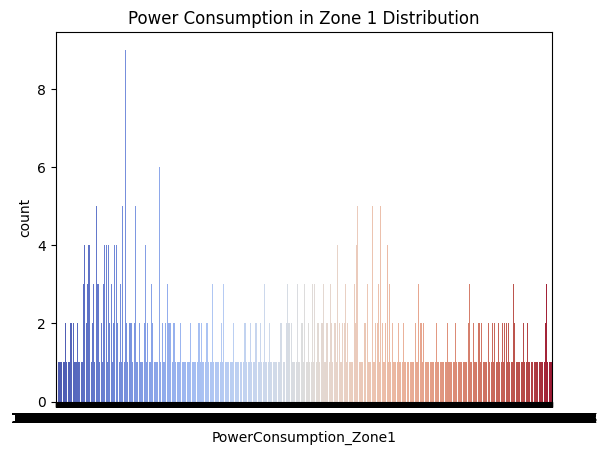

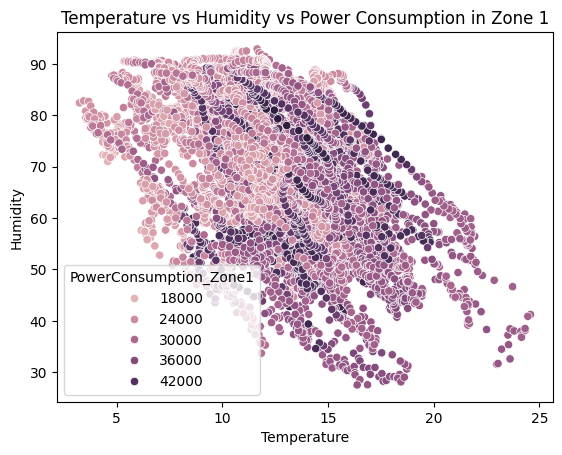

<ipython-input-1-8a63d1c3a7b6>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PowerConsumption_Zone1', y='WindSpeed', data=df, palette='coolwarm')


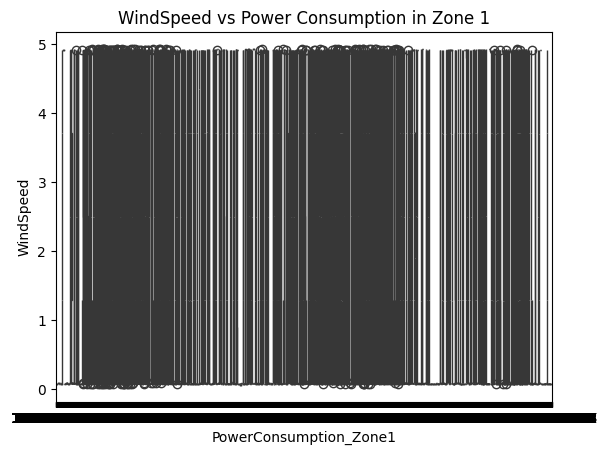

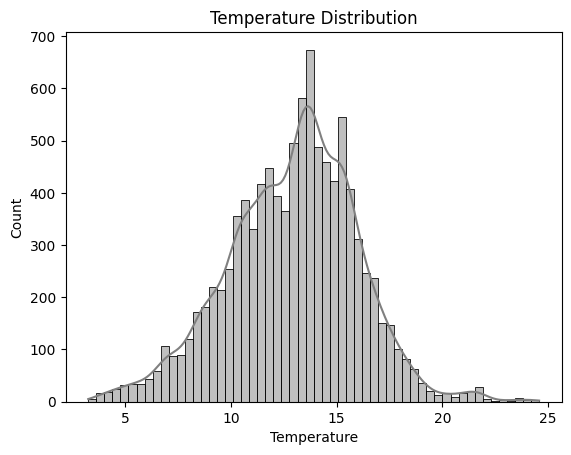

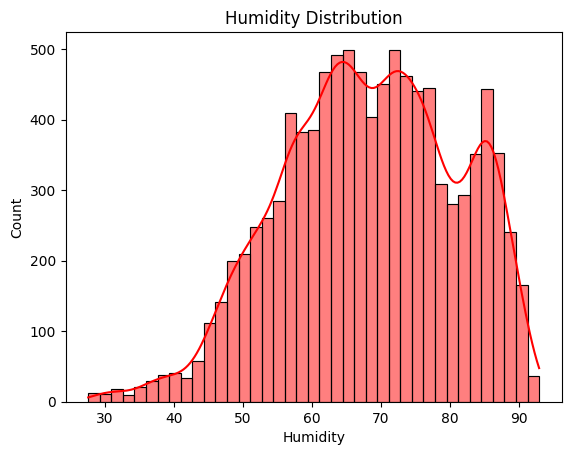

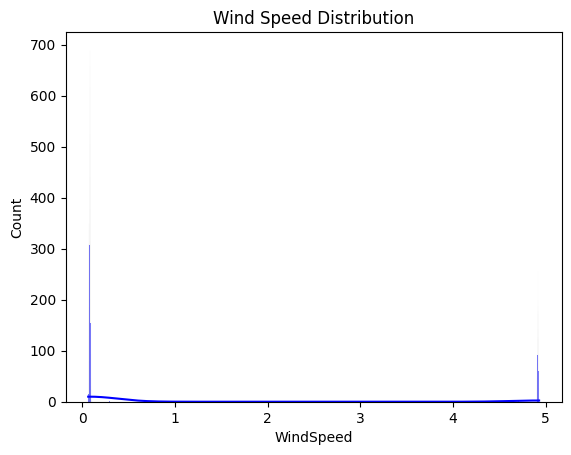

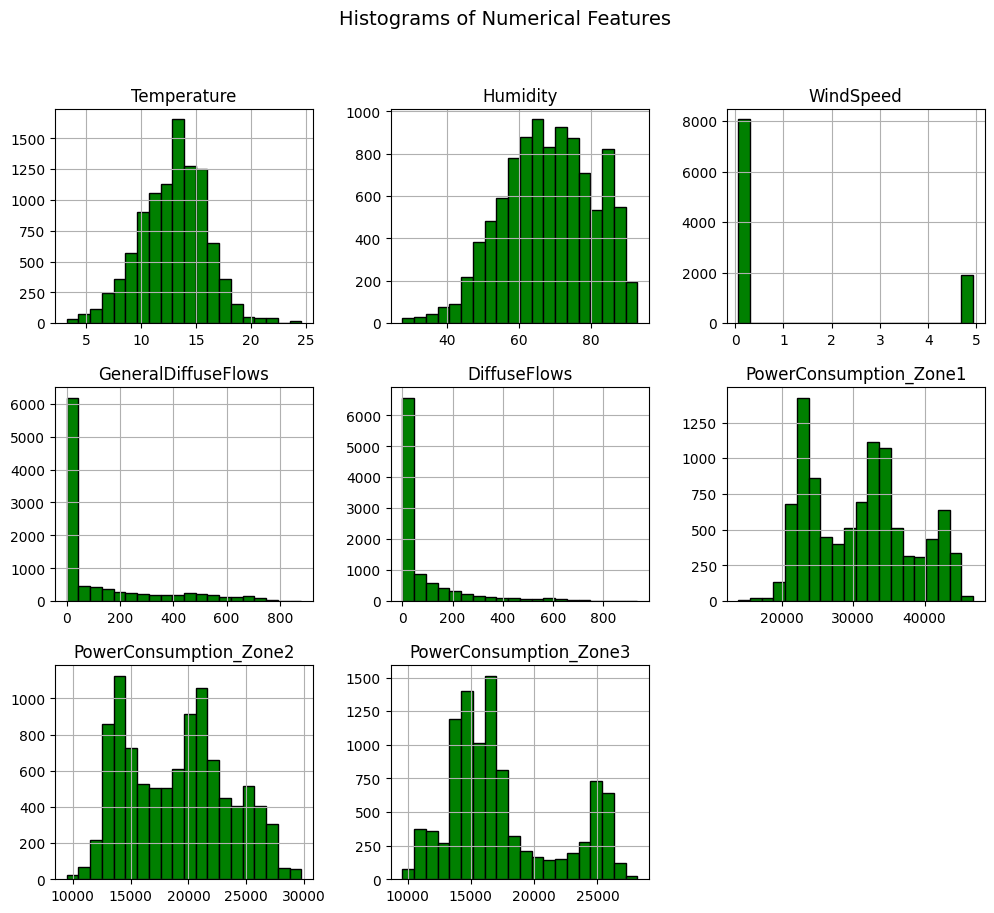

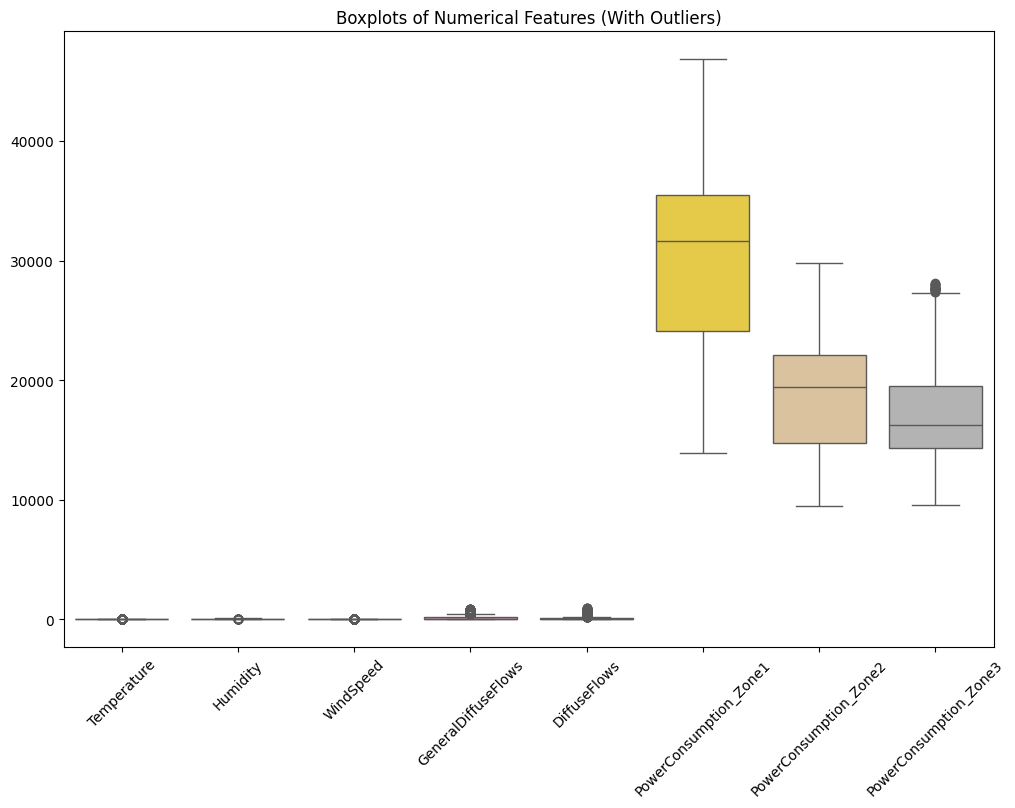

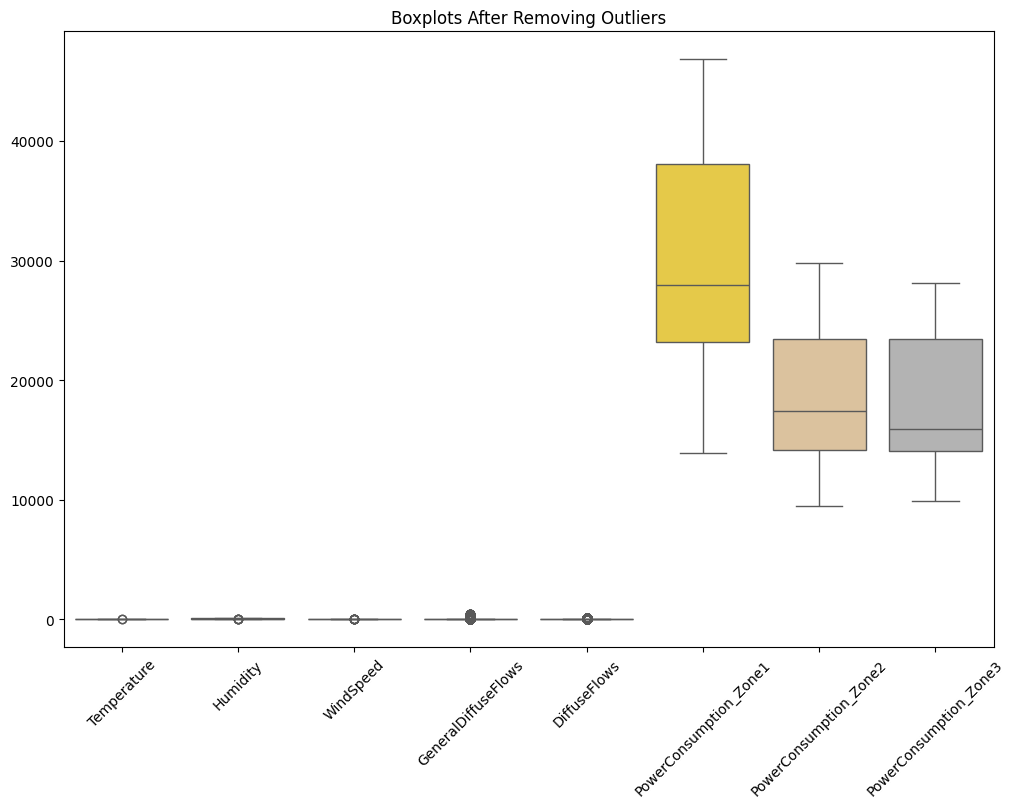

Temperature - Skewness: -0.30, Kurtosis: -0.33
Humidity - Skewness: -0.29, Kurtosis: -0.65
WindSpeed - Skewness: -0.17, Kurtosis: -0.44
GeneralDiffuseFlows - Skewness: 3.84, Kurtosis: 15.87
DiffuseFlows - Skewness: 2.31, Kurtosis: 4.18
PowerConsumption_Zone1 - Skewness: 0.42, Kurtosis: -1.26
PowerConsumption_Zone2 - Skewness: 0.40, Kurtosis: -1.23
PowerConsumption_Zone3 - Skewness: 0.49, Kurtosis: -1.24

Random Forest Model Mean Squared Error: 1148210.9582
Random Forest Model R^2 Score: 0.9826

Support Vector Machine Model Mean Squared Error: 62905359.4301
Support Vector Machine Model R^2 Score: 0.0479

Linear Regression Model Mean Squared Error: 3256129.2937
Linear Regression Model R^2 Score: 0.9507


In [1]:
from IPython import get_ipython
from IPython.display import display
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Now define the models correctly
models = {
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "Linear Regression": LinearRegression()
}
# %%
df=pd.read_csv("/content/powerconsumption.csv")
df.shape
# %%
df.info()
# %%
df.head(20)

# %%
# Handle missing values if any (e.g., fill or drop)
df.isnull().sum()

# Drop columns that aren't useful for prediction, if necessary
df.drop(columns=['Datetime'], inplace=True)
df = df.iloc[:10000]
# %%
sns.countplot(x='PowerConsumption_Zone1', data=df, palette='coolwarm')
plt.title("Power Consumption in Zone 1 Distribution")
plt.show()
# %%
# Visualize relationships between variables
sns.scatterplot(x='Temperature', y='Humidity', data=df, hue='PowerConsumption_Zone1')
plt.title("Temperature vs Humidity vs Power Consumption in Zone 1")
plt.show()
# %%
sns.boxplot(x='PowerConsumption_Zone1', y='WindSpeed', data=df, palette='coolwarm')
plt.title("WindSpeed vs Power Consumption in Zone 1")
plt.show()
# %%
# Exploring distribution of temperature, humidity, and wind speed
sns.histplot(df['Temperature'], kde=True, color='grey')
plt.title("Temperature Distribution")
plt.show()
# %%
sns.histplot(df['Humidity'], kde=True, color='red')
plt.title("Humidity Distribution")
plt.show()
# %%
sns.histplot(df['WindSpeed'], kde=True, color='blue')
plt.title("Wind Speed Distribution")
plt.show()
# %%
# Select only numerical columns (excluding categorical data)
num_cols = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows',
            'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']
# %%
# Plot histograms for numerical features with green color
df[num_cols].hist(figsize=(12, 10), bins=20, edgecolor='black', color='green')
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()
# %%
# Boxplot to visualize outliers (excluding categorical columns)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_cols], palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features (With Outliers)")
plt.show()
# %%
# Outlier Removal using IQR method
def remove_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# %%
# Removing outliers from numerical columns
df_cleaned = remove_outliers(df, num_cols)
# %%
# Boxplot after removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[num_cols], palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplots After Removing Outliers")
plt.show()
# %%
# Calculate Skewness and Kurtosis
for col in num_cols:
    print(f"{col} - Skewness: {skew(df_cleaned[col]):.2f}, Kurtosis: {kurtosis(df_cleaned[col]):.2f}")
# %%
# Since this is a regression problem (predicting power consumption), we will use these as target columns
# Let's use PowerConsumption_Zone1 as the target variable and others as features
X = df_cleaned.drop(columns=['PowerConsumption_Zone1'])  # Features
y = df_cleaned['PowerConsumption_Zone1']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# %%
# Train and evaluate three machine learning models
models = {
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "Linear Regression": LinearRegression()
}
# %%
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Since we are using regression models, accuracy score is not applicable here.
    # Instead of accuracy score and classification report, we use a generic method to evaluate regression models
    from sklearn.metrics import mean_squared_error, r2_score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name} Model Mean Squared Error: {mse:.4f}")
    print(f"{name} Model R^2 Score: {r2:.4f}")